<a href="https://colab.research.google.com/github/TransparentDeveloper/Dacon_Challenge/blob/Consumption_Prediction_Contest/%5Bver5%5D%EC%86%8C%EB%B9%84%EC%9E%90_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EA%B8%B0%EB%B0%98_%EC%86%8C%EB%B9%84_%EC%98%88%EC%B8%A1_%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[V5]결과 이력:
---
1. [Top1 Model]		socore1 : 0.19212050673669342
2. [Top3 Blend Model]	socore2 : 0.1168136817080761
3. [Top5 Blend Model]	socore3 : 0.10983821010499523
4. [Top6 Blend Model]	socore4 : 0.10560418198766998

#패키지 불러오기

In [1]:
!pip install -U pandas-profiling
!pip install MarkupSafe==2.0.1

     |████████████████████████████████| 262 kB 14.5 MB/s 
     |████████████████████████████████| 102 kB 14.5 MB/s 
     |████████████████████████████████| 690 kB 50.2 MB/s 
     |████████████████████████████████| 4.7 MB 51.5 MB/s 
     |████████████████████████████████| 10.9 MB 49.3 MB/s 
     |████████████████████████████████| 596 kB 67.3 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
     |████████████████████████████████| 812 kB 68.8 MB/s 
     |████████████████████████████████| 38.1 MB 1.4 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=d5a37ad912a54abe48c0f5574a4ae2ae000a96dba226257250470f4f3a3a829e
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295206 sha256=7d4c50510f95cf185579c8a1c7cf9670d93d43084f04fd42686116b960170c18
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e

In [2]:
! pip install pycaret[full]
! pip install markupsafe==2.0.1

     |████████████████████████████████| 320 kB 14.3 MB/s 
     |████████████████████████████████| 1.3 MB 65.6 MB/s 
     |████████████████████████████████| 1.7 MB 67.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 16.8 MB 617 kB/s 
     |████████████████████████████████| 56 kB 3.1 MB/s 
     |████████████████████████████████| 636 kB 7.2 MB/s 
     |████████████████████████████████| 6.8 MB 11.1 MB/s 
     |████████████████████████████████| 2.0 MB 48.1 MB/s 
     |████████████████████████████████| 25.9 MB 10.0 MB/s 
     |████████████████████████████████| 118 kB 21.4 MB/s 
     |████████████████████████████████| 88 kB 5.4 MB/s 
     |████████████████████████████████| 167 kB 54.9 MB/s 
     |████████████████████████████████| 564 kB 50.2 MB/s 
     |████████████████████████████████| 53 kB 2.5 MB/s 
     |███████████████████

  Using cached MarkupSafe-2.0.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (31 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [273]:
import pandas as pd
import pandas_profiling
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
import scipy.stats as stats

import sklearn

from sklearn.model_selection import GridSearchCV, cross_val_score, RepeatedKFold
from sklearn import metrics

from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

#데이터 불러오기

In [407]:
pwd

'/content/drive/MyDrive/Dacon_Data/Comsume'

In [408]:
cd './drive/MyDrive/Dacon_Data/Comsume'

[Errno 2] No such file or directory: './drive/MyDrive/Dacon_Data/Comsume'
/content/drive/MyDrive/Dacon_Data/Comsume


In [409]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

#데이터 보기

In [ ]:
train.info()
print(train.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1108 non-null   int64  
 1   Year_Birth                           1108 non-null   int64  
 2   Education                            1108 non-null   object 
 3   Marital_Status                       1108 non-null   object 
 4   Income                               1108 non-null   float64
 5   Kidhome                              1108 non-null   int64  
 6   Teenhome                             1108 non-null   int64  
 7   Dt_Customer                          1108 non-null   object 
 8   Recency                              1108 non-null   int64  
 9   NumDealsPurchases                    1108 non-null   float64
 10  NumWebPurchases                      1108 non-null   float64
 11  NumCatalogPurchases           

In [ ]:
test.info()
print(test.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1108 non-null   int64  
 1   Year_Birth                           1108 non-null   int64  
 2   Education                            1108 non-null   object 
 3   Marital_Status                       1108 non-null   object 
 4   Income                               1108 non-null   float64
 5   Kidhome                              1108 non-null   int64  
 6   Teenhome                             1108 non-null   int64  
 7   Dt_Customer                          1108 non-null   object 
 8   Recency                              1108 non-null   int64  
 9   NumDealsPurchases                    1108 non-null   float64
 10  NumWebPurchases                      1108 non-null   float64
 11  NumCatalogPurchases           

In [ ]:
profile = train.profile_report()
profile.to_file('/content/drive/MyDrive/Dacon_Data/Comsume/temp_data/profile_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [ ]:
profile

- id : 샘플 아이디
- Year_Birth : 고객 생년월일
- Education : 고객 학력
- Marital_status : 고객 결혼 상태 
- Income : 고객 연간 가구 소득 
- Kidhome : 고객 가구의 자녀 수 
- Teenhome : 고객 가구의 청소년 수 
- Dt_Customer : 고객이 회사에 등록한 날짜
- Recency : 고객의 마지막 구매 이후 일수 
- NumDealsPurchases : 할인된 구매 횟수 
- NumWebPurchases : 회사 웹사이트를 통한 구매 건수
- NumCatalogPurchases : 카탈로그를 사용한 구매 수 
- NumStorePuchases : 매장에서 직접 구매한 횟수
- NumWebVisitsMonth : 지난 달 회사 웹사이트 방문 횟수
- AcceptedCmp(1-5) : 고객이 (1-5) 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
- Complain : 고객이 지난 2년 동안 불만을 제기한 경우 1, 그렇지 않은 경우 0
- Response : 고객이 마지막 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
- target : 고객의 제품 총 소비량

In [ ]:
test.isnull().sum()

#Outliers 확인 및 제거

## IQR method
- IQR: 데이터 범위를 사분할 하였을 때, 1사분위수(Q1) 에서 3사분위수(Q3)까지의 길이
- outliers: 
 1. ~ (Q1 - 1.5*IQR) 
 2.   (Q3 + 1.5*IQR) ~

In [410]:
df_train = train.copy()
df_test = test.copy()

In [411]:
numeric_fts = ['Year_Birth', 'Income', 'Recency', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

train_outlier_ind = []
for i in numeric_fts:
  Q1 = np.percentile(df_train[i],25)
  Q3 = np.percentile(df_train[i],75)
  IQR = Q3-Q1
  train_outlier_list = df_train[(df_train[i] < Q1 - IQR * 1.5) | (df_train[i] > Q3 + IQR * 1.5)].index
  print(train_outlier_list)
  train_outlier_ind.extend(train_outlier_list)

train_outlier_ind = Counter(train_outlier_ind)
print(train_outlier_ind)
train_multi_outliers = list(k for k,j in train_outlier_ind.items() if j > 2)  

print("The number of train outliers :", len(train_multi_outliers))

Int64Index([760, 865], dtype='int64')
Int64Index([246, 686, 730], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([   0,    4,   12,   44,   64,   90,   91,  149,  155,  157,  182,
             184,  205,  211,  225,  236,  306,  344,  361,  367,  414,  510,
             541,  600,  690,  696,  697,  701,  717,  736,  778,  791,  864,
             872,  890,  898,  927,  946,  975, 1002, 1038, 1066, 1067, 1074,
            1101, 1106],
           dtype='int64')
Int64Index([617, 892], dtype='int64')
Int64Index([89, 243, 348, 572, 604, 640, 900, 975, 979], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([91, 182, 297, 1097], dtype='int64')
Counter({91: 2, 182: 2, 975: 2, 760: 1, 865: 1, 246: 1, 686: 1, 730: 1, 0: 1, 4: 1, 12: 1, 44: 1, 64: 1, 90: 1, 149: 1, 155: 1, 157: 1, 184: 1, 205: 1, 211: 1, 225: 1, 236: 1, 306: 1, 344: 1, 361: 1, 367: 1, 414: 1, 510: 1, 541: 1, 600: 1, 690: 1, 696: 1, 697: 1, 701: 1, 717: 1, 736: 1, 778: 1, 791: 1, 864: 1, 872: 1, 890: 1, 898: 1, 92

## skewness(비대칭성)

In [412]:
print(df_train[numeric_fts].skew())

Year_Birth            -0.439100
Income                 0.291634
Recency               -0.061310
NumDealsPurchases      2.264245
NumWebPurchases        1.289607
NumCatalogPurchases    1.099499
NumStorePurchases      0.653689
NumWebVisitsMonth      0.299000
dtype: float64


# 데이터 전처리

In [413]:
high_skewness = ['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases']

### 방법 1. Log transformation
### 방법 2. Yeo-Johnson transformation

#### 방법 1,2 적용 전 살펴보기

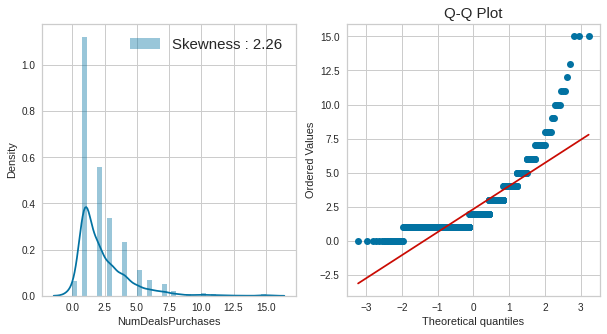

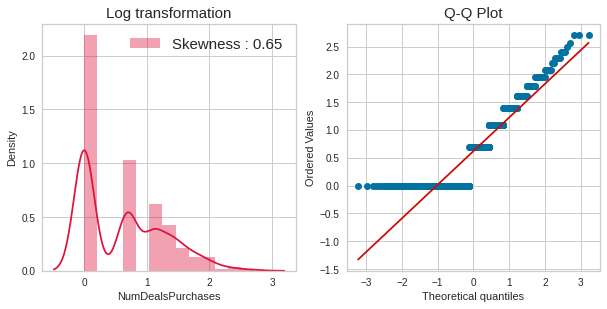

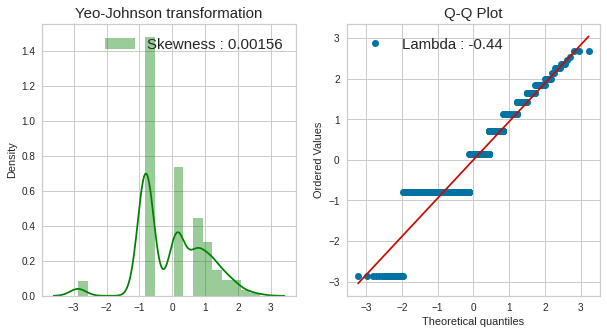

In [414]:
fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.distplot(df_train[high_skewness[0]], ax = ax1, label='Skewness : {:.2f}'.format(df_train[high_skewness[0]].skew()))
ax1.legend(loc='best', fontsize = 15)

stats.probplot(df_train[high_skewness[0]], plot = ax2)
plt.title("Q-Q Plot", fontsize = 15)

plt.show()

log_trans = df_train[high_skewness[0]].map(lambda i: np.log(i) if i > 0 else 0)

fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)

sns.distplot(log_trans, ax = ax1, color='crimson', label='Skewness : {:.2f}'.format(log_trans.skew()))
ax1.legend(loc='best', fontsize = 15)
ax1.set_title('Log transformation', fontsize = 15)

stats.probplot(log_trans, plot = ax2)
ax2.set_title("Q-Q Plot", fontsize = 15)
plt.show()

jy = PowerTransformer(method = 'yeo-johnson')
jy.fit(df_train[high_skewness[0]].values.reshape(-1, 1))
x_yj = jy.transform(df_train[high_skewness[0]].values.reshape(-1, 1))

fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.distplot(x_yj, ax = ax1, color='green', label='Skewness : {:.5f}'.format(np.float(stats.skew(x_yj))))
ax1.legend(loc='best', fontsize = 15)
ax1.set_title('Yeo-Johnson transformation', fontsize = 15)

stats.probplot(x_yj.reshape(x_yj.shape[0]), plot = ax2)
ax2.legend(['Lambda : {:.2f}'.format(np.float(jy.lambdas_))], loc='best', fontsize = 15)
ax2.set_title("Q-Q Plot", fontsize = 15)
plt.show()

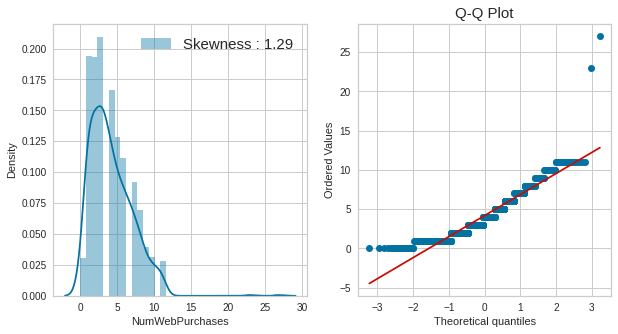

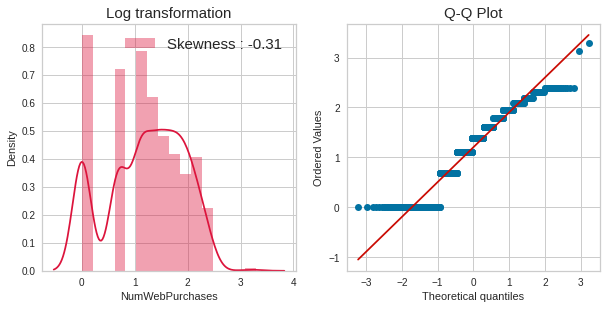

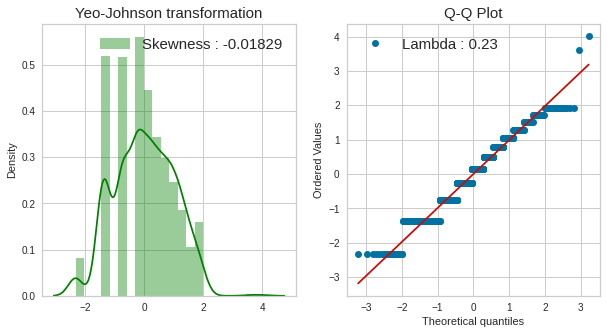

In [415]:
fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.distplot(df_train[high_skewness[1]], ax = ax1, label='Skewness : {:.2f}'.format(df_train[high_skewness[1]].skew()))
ax1.legend(loc='best', fontsize = 15)

stats.probplot(df_train[high_skewness[1]], plot = ax2)
plt.title("Q-Q Plot", fontsize = 15)

plt.show()

log_trans = df_train[high_skewness[1]].map(lambda i: np.log(i) if i > 0 else 0)

fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)

sns.distplot(log_trans, ax = ax1, color='crimson', label='Skewness : {:.2f}'.format(log_trans.skew()))
ax1.legend(loc='best', fontsize = 15)
ax1.set_title('Log transformation', fontsize = 15)

stats.probplot(log_trans, plot = ax2)
ax2.set_title("Q-Q Plot", fontsize = 15)
plt.show()


jy = PowerTransformer(method = 'yeo-johnson')
jy.fit(df_train[high_skewness[1]].values.reshape(-1, 1))
x_yj = jy.transform(df_train[high_skewness[1]].values.reshape(-1, 1))

fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.distplot(x_yj, ax = ax1, color='green', label='Skewness : {:.5f}'.format(np.float(stats.skew(x_yj))))
ax1.legend(loc='best', fontsize = 15)
ax1.set_title('Yeo-Johnson transformation', fontsize = 15)

stats.probplot(x_yj.reshape(x_yj.shape[0]), plot = ax2)
ax2.legend(['Lambda : {:.2f}'.format(np.float(jy.lambdas_))], loc='best', fontsize = 15)
ax2.set_title("Q-Q Plot", fontsize = 15)
plt.show()

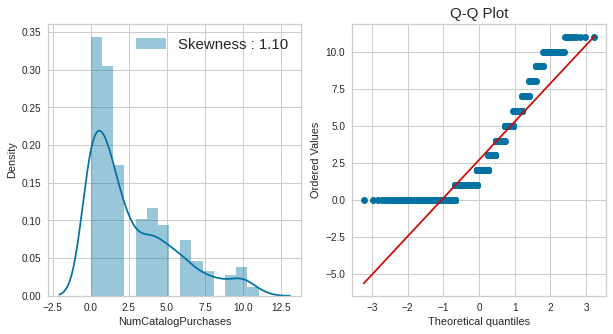

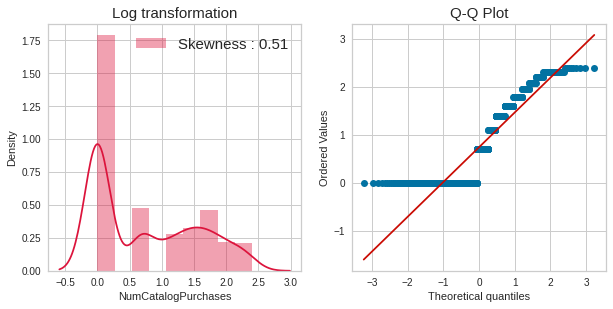

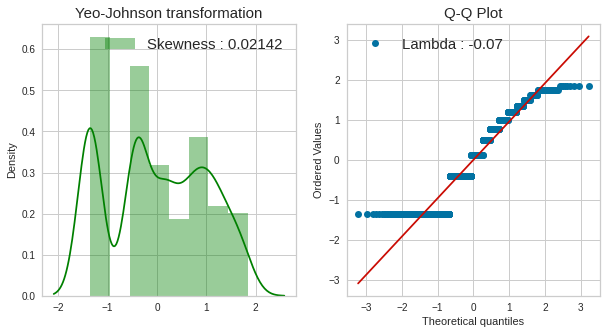

In [416]:
fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.distplot(df_train[high_skewness[2]], ax = ax1, label='Skewness : {:.2f}'.format(df_train[high_skewness[2]].skew()))
ax1.legend(loc='best', fontsize = 15)

stats.probplot(df_train[high_skewness[2]], plot = ax2)
plt.title("Q-Q Plot", fontsize = 15)

plt.show()

log_trans = df_train[high_skewness[2]].map(lambda i: np.log(i) if i > 0 else 0)

fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)

sns.distplot(log_trans, ax = ax1, color='crimson', label='Skewness : {:.2f}'.format(log_trans.skew()))
ax1.legend(loc='best', fontsize = 15)
ax1.set_title('Log transformation', fontsize = 15)

stats.probplot(log_trans, plot = ax2)
ax2.set_title("Q-Q Plot", fontsize = 15)
plt.show()


jy = PowerTransformer(method = 'yeo-johnson')
jy.fit(df_train[high_skewness[2]].values.reshape(-1, 1))
x_yj = jy.transform(df_train[high_skewness[2]].values.reshape(-1, 1))

fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.distplot(x_yj, ax = ax1, color='green', label='Skewness : {:.5f}'.format(np.float(stats.skew(x_yj))))
ax1.legend(loc='best', fontsize = 15)
ax1.set_title('Yeo-Johnson transformation', fontsize = 15)

stats.probplot(x_yj.reshape(x_yj.shape[0]), plot = ax2)
ax2.legend(['Lambda : {:.2f}'.format(np.float(jy.lambdas_))], loc='best', fontsize = 15)
ax2.set_title("Q-Q Plot", fontsize = 15)
plt.show()

## (1) high_skewness에 Yeo-Johnson transformation 적용

In [417]:
jy = PowerTransformer(method = 'yeo-johnson')

for elem in high_skewness:
  jy.fit(df_train[elem].values.reshape(-1, 1))
  x_yj = jy.transform(df_train[elem].values.reshape(-1, 1))
  train[elem] = x_yj

In [418]:
jy = PowerTransformer(method = 'yeo-johnson')

for elem in high_skewness:
  jy.fit(df_test[elem].values.reshape(-1, 1))
  x_yj = jy.transform(df_test[elem].values.reshape(-1, 1))
  test[elem] = x_yj

In [419]:
for elem in high_skewness:
  print(elem)
  print(train[elem])
  print("===========")

NumDealsPurchases
0       2.258975
1      -0.801066
2       0.146388
3       0.146388
4       1.846930
          ...   
1103    1.421688
1104    0.723198
1105   -0.801066
1106    2.006092
1107    1.656227
Name: NumDealsPurchases, Length: 1108, dtype: float64
NumWebPurchases
0       1.050430
1       0.482071
2       0.782006
3      -0.258585
4       1.294037
          ...   
1103   -0.258585
1104   -0.258585
1105   -1.377247
1106    0.782006
1107    0.140592
Name: NumWebPurchases, Length: 1108, dtype: float64
NumCatalogPurchases
0      -0.406135
1       1.740256
2       1.195863
3      -1.354700
4       0.127798
          ...   
1103   -0.406135
1104   -1.354700
1105   -1.354700
1106   -0.406135
1107   -0.406135
Name: NumCatalogPurchases, Length: 1108, dtype: float64


In [420]:
for elem in high_skewness:
  print(elem)
  print(test[elem])
  print("===========")

NumDealsPurchases
0       1.176800
1       0.175042
2       0.774153
3       1.176800
4       0.175042
          ...   
1103    0.774153
1104   -0.851160
1105   -0.851160
1106    1.876944
1107    1.176800
Name: NumDealsPurchases, Length: 1108, dtype: float64
NumWebPurchases
0       0.221723
1      -0.687081
2       0.567207
3       1.136322
4       0.868433
          ...   
1103   -0.687081
1104   -1.350366
1105   -1.350366
1106   -0.687081
1107   -0.185733
Name: NumWebPurchases, Length: 1108, dtype: float64
NumCatalogPurchases
0       0.542384
1       0.813869
2       0.542384
3       0.813869
4       1.361196
          ...   
1103   -1.327545
1104   -1.327545
1105   -0.351564
1106    1.030062
1107    0.180864
Name: NumCatalogPurchases, Length: 1108, dtype: float64


In [421]:
corr_fts1 = ['Income', 'Kidhome','NumDealsPurchases' ,'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1', 'AcceptedCmp5', 'target']

<AxesSubplot:>

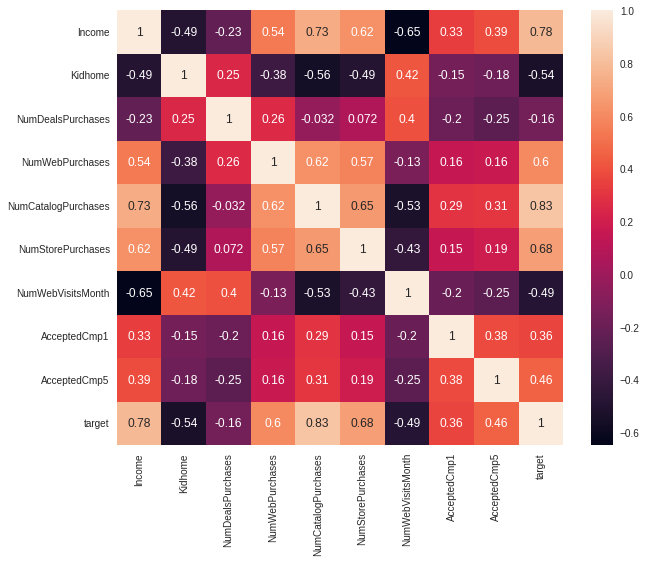

In [422]:
plt.figure(figsize = (10,8))
sns.heatmap(train[corr_fts1].corr(), annot = True)

## (2) 'NumCatalogPurchases' + 'NumStorePurchases' + 'NumWebPurchases'
[new_Feature: AllPurchases]

In [423]:
train['AllPurchases'] = train['NumCatalogPurchases'] + train['NumStorePurchases'] + train['NumWebPurchases'] 
test['AllPurchases'] = test['NumCatalogPurchases'] + test['NumStorePurchases'] + test['NumWebPurchases'] 

In [424]:
corr_fts2 = ['Income', 'Teenhome','Kidhome','NumDealsPurchases' ,'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1', 'AcceptedCmp5','AllPurchases','target']

<AxesSubplot:>

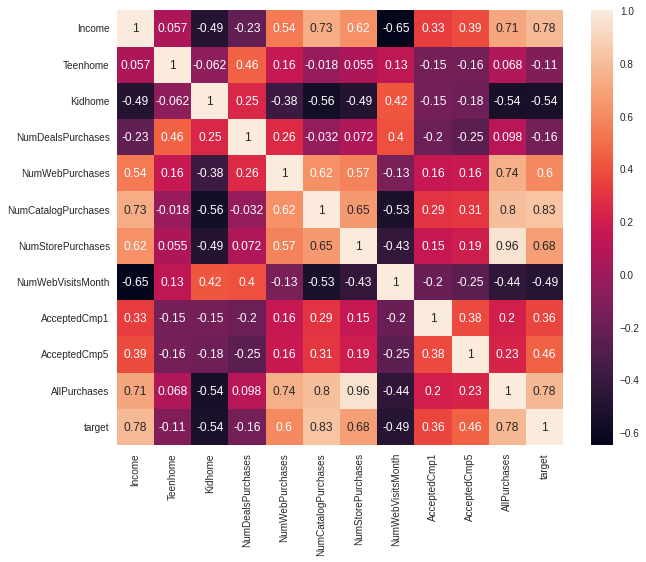

In [425]:
plt.figure(figsize = (10,8))
sns.heatmap(train[corr_fts2].corr(), annot = True)

## (3) 'Kidhome' 과 'Teenhome' 병합 이후, 딸린 식구 당 수입 계산
[new_Feature: IncomePerCompanion]

In [426]:
tmp_train = train.copy()
tmp_test = test.copy()

In [427]:
tmp_train['Companion'] = tmp_train['Kidhome']+tmp_train['Teenhome']
tmp_test['Companion'] = tmp_test['Kidhome']+tmp_test['Teenhome']

In [428]:
tmp_train['IncomePerCompanion'] = tmp_train['Income']/(tmp_train['Companion']+1)
tmp_test['IncomePerCompanion'] = tmp_test['Income']/(tmp_test['Companion']+1)

In [429]:
corr_fts3 = ['Income', 'Teenhome','Kidhome','NumDealsPurchases' ,'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1', 'AcceptedCmp5','AllPurchases','IncomePerCompanion','target']

<AxesSubplot:>

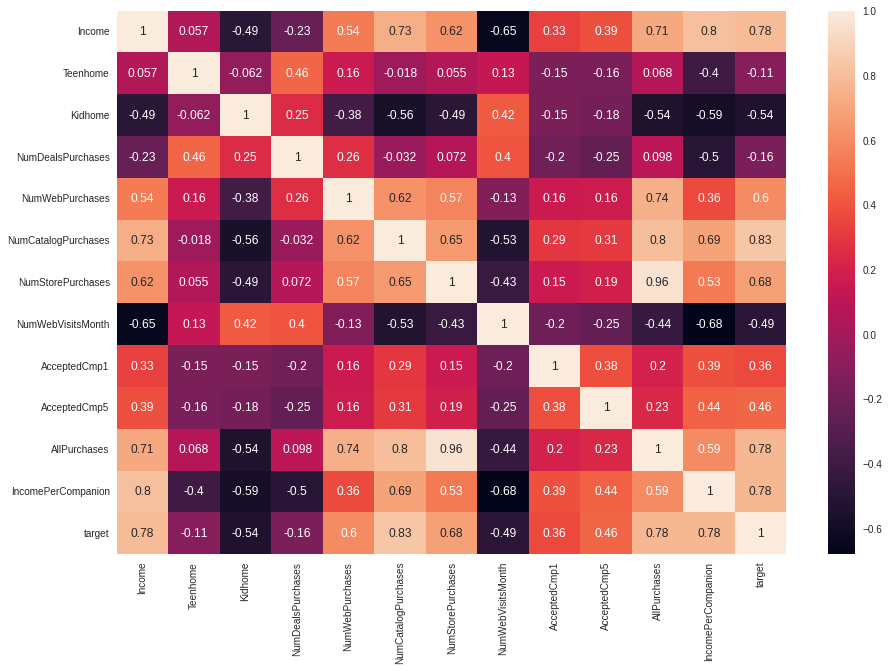

In [430]:
plt.figure(figsize = (15,10))
sns.heatmap(tmp_train[corr_fts3].corr(), annot = True)

In [431]:
train['IncomePerCompanion']=tmp_train['IncomePerCompanion']
test['IncomePerCompanion']=tmp_test['IncomePerCompanion']

In [432]:
train['IncomePerCompanion']

0       15338.000000
1       38312.000000
2       37951.500000
3        9196.500000
4       16003.500000
            ...     
1103    23048.500000
1104    11738.500000
1105    18684.000000
1106    17678.000000
1107    15536.666667
Name: IncomePerCompanion, Length: 1108, dtype: float64

In [433]:
test['IncomePerCompanion']

0       28768.500000
1       32874.000000
2       27717.000000
3       33858.000000
4       42803.000000
            ...     
1103    11901.333333
1104    11974.666667
1105    33996.000000
1106    18713.500000
1107    15366.000000
Name: IncomePerCompanion, Length: 1108, dtype: float64

## (4) Dt_Customer 형식변경
[new_Feature: Pass_Customer]

In [434]:
train['Dt_Customer']

0       21-01-2013
1       24-05-2014
2       08-04-2013
3       29-03-2014
4       10-06-2014
           ...    
1103    31-03-2013
1104    21-10-2013
1105    16-12-2013
1106    30-05-2013
1107    29-10-2012
Name: Dt_Customer, Length: 1108, dtype: object

In [435]:
tmp_train["Dt_Customer"] = pd.to_datetime(tmp_train["Dt_Customer"], format='%d-%m-%Y')
tmp_test["Dt_Customer"] = pd.to_datetime(tmp_test["Dt_Customer"], format='%d-%m-%Y')

tmp_train["Dt_Customer"]

0      2013-01-21
1      2014-05-24
2      2013-04-08
3      2014-03-29
4      2014-06-10
          ...    
1103   2013-03-31
1104   2013-10-21
1105   2013-12-16
1106   2013-05-30
1107   2012-10-29
Name: Dt_Customer, Length: 1108, dtype: datetime64[ns]

In [436]:
print(f'Minimum date: {tmp_train["Dt_Customer"].min()}')
print(f'Maximum date: {tmp_train["Dt_Customer"].max()}')

Minimum date: 2012-07-31 00:00:00
Maximum date: 2014-06-29 00:00:00


In [437]:
train_diff_date = tmp_train["Dt_Customer"] - tmp_train["Dt_Customer"].min()
test_diff_date = tmp_test["Dt_Customer"] - tmp_test["Dt_Customer"].min()

tmp_train["Pass_Customer"] = [i.days for i in train_diff_date]
tmp_test["Pass_Customer"] = [i.days for i in test_diff_date]

In [438]:
train["Pass_Customer"] = tmp_train["Pass_Customer"]
test["Pass_Customer"] = tmp_test["Pass_Customer"]

## (5) Year_Birth 형식 변환
[new_Feature: Generation, Indivi_income_relato_avg_incom_gene]

In [439]:
tmp_train = train.copy()
tmp_test = test.copy()

In [440]:
print("Minimum birth :", tmp_train["Year_Birth"].min(), "\nMaximum birth :", tmp_train["Year_Birth"].max(), "\n")

Minimum birth : 1893 
Maximum birth : 1996 



In [441]:
tmp_train["Age"] = 2022 - tmp_train["Year_Birth"] + 1
tmp_test["Age"] = 2022 - tmp_test["Year_Birth"] + 1

tmp_train["Age"].head(100)

0     49
1     61
2     72
3     49
4     77
      ..
95    63
96    52
97    52
98    37
99    64
Name: Age, Length: 100, dtype: int64

In [442]:
print(tmp_train["Age"].sort_values())

751     27
833     28
691     28
631     28
827     30
      ... 
483     80
179     82
922     83
760    123
865    130
Name: Age, Length: 1108, dtype: int64


In [443]:
print(tmp_test["Age"].sort_values())

536     27
557     28
98      28
150     29
946     29
      ... 
725     79
193     79
430     79
720     80
708    124
Name: Age, Length: 1108, dtype: int64


### [Generation]: 10살 단위로 한 세대 구분 

In [444]:
tmp_train['Generation'] = [int(i/10)*10 for i in tmp_train['Age'] ]
tmp_test['Generation'] = [int(i/10)*10 for i in tmp_test['Age'] ]

In [445]:
tmp_train.loc[tmp_train['Generation'] >= 80, 'Generation'] = 80
tmp_test.loc[tmp_test['Generation'] >= 80, 'Generation'] = 80

In [446]:
print(tmp_train['Generation'].unique())

[40 60 70 50 30 80 20]


In [447]:
print(tmp_train['Generation'].unique())
print(tmp_test['Generation'].unique())

[40 60 70 50 30 80 20]
[40 60 30 50 70 20 80]


### [Indivi_income_relato_avg_incom_gene]: 본인의 Income - 세대당 평균 Income

In [448]:
incom_per_gene = [0]*7
cnt_person_per_gene = [0]*7

for age,incom in  zip(tmp_train['Age'],tmp_train['Income']):
  if age<30:
    incom_per_gene[0] += incom
    cnt_person_per_gene[0] +=1
  elif age<40:
    incom_per_gene[1] += incom
    cnt_person_per_gene[1] +=1
  elif age<50:
    incom_per_gene[2] += incom
    cnt_person_per_gene[2] +=1
  elif age<60:
    incom_per_gene[3] += incom
    cnt_person_per_gene[3] +=1
  elif age<70:
    incom_per_gene[4] += incom
    cnt_person_per_gene[4] +=1
  elif age<80:
    incom_per_gene[5] += incom
    cnt_person_per_gene[5] +=1
  else:
    incom_per_gene[6] += incom
    cnt_person_per_gene[6] +=1


for i in range(7):
  print(i+2,"0  대 ",incom_per_gene[i],cnt_person_per_gene[i])

avg_incom_per_gene = [int(incom_per_gene[i]/cnt_person_per_gene[i]) for i in range(7)]
print(avg_incom_per_gene)

2 0  대  148311.0 4
3 0  대  5697429.0 128
4 0  대  13549525.0 277
5 0  대  16700570.0 328
6 0  대  13309064.0 231
7 0  대  7729111.0 131
8 0  대  565987.0 9
[37077, 44511, 48915, 50916, 57614, 59000, 62887]


In [449]:
Indivi_income_relato_avg_incom_gene = []
for gen,incom in zip(tmp_train['Generation'],tmp_train['Income']):
  if gen == 20:
    Indivi_income_relato_avg_incom_gene.append(int(incom-avg_incom_per_gene[0]))
  elif gen == 30:
    Indivi_income_relato_avg_incom_gene.append(int(incom-avg_incom_per_gene[1]))
  elif gen == 40:
    Indivi_income_relato_avg_incom_gene.append(int(incom-avg_incom_per_gene[2]))
  elif gen == 50:
    Indivi_income_relato_avg_incom_gene.append(int(incom-avg_incom_per_gene[3]))
  elif gen == 60:
    Indivi_income_relato_avg_incom_gene.append(int(incom-avg_incom_per_gene[4]))
  elif gen == 70:
    Indivi_income_relato_avg_incom_gene.append(int(incom-avg_incom_per_gene[5]))
  elif gen == 80:
    Indivi_income_relato_avg_incom_gene.append(int(incom-avg_incom_per_gene[6]))

print(Indivi_income_relato_avg_incom_gene)

[-2901, 19010, 16903, -30522, 5014, -11042, -28112, 5247, -5228, 2823, 16356, -3712, 3845, -5210, -18284, 26415, 30036, 19423, 32712, -25556, -7936, -2809, 354, -18564, 31229, -26753, 29501, -24958, 33774, -12326, -16439, -15666, 20804, -18819, 4444, 21208, 18485, 22711, -3386, -17562, 21588, -21342, -15125, -7616, 5504, -14751, -11631, -23852, -37011, -9278, -35107, -6797, -13919, 24320, -36344, -26153, -7092, 25884, -11520, 30252, 23336, 26522, 21123, 30993, 14417, -6151, -10279, 26097, -21481, -11430, -7434, 30922, 24770, -469, 18223, 14819, -22008, -15687, -12653, -542, -20094, -12769, -34290, -13063, -7463, -14201, 6648, 13643, 45489, -8138, 5014, -53591, 1596, -19036, 26846, -16339, -18905, -18024, -17695, 5419, -34066, -34319, 17728, 14392, -10301, 19497, 1998, -27270, -1801, 6886, -17460, -2125, -21244, -9783, -12029, 33014, -14599, 17647, 1615, 11639, 5023, -12750, 22024, 14610, 22044, 24400, -19233, -42558, -20197, -27438, 23081, 9110, -28342, 27703, -34107, -3926, -2766, 349

In [450]:
tmp_train['Indivi_income_relato_avg_incom_gene'] = Indivi_income_relato_avg_incom_gene

In [451]:
incom_per_gene_test = [0]*7
cnt_person_per_gene_test = [0]*7

for age,incom in  zip(tmp_test['Age'],tmp_test['Income']):
  if age<30:
    incom_per_gene_test[0] += incom
    cnt_person_per_gene_test[0] +=1
  elif age<40:
    incom_per_gene_test[1] += incom
    cnt_person_per_gene_test[1] +=1
  elif age<50:
    incom_per_gene_test[2] += incom
    cnt_person_per_gene_test[2] +=1
  elif age<60:
    incom_per_gene_test[3] += incom
    cnt_person_per_gene_test[3] +=1
  elif age<70:
    incom_per_gene_test[4] += incom
    cnt_person_per_gene_test[4] +=1
  elif age<80:
    incom_per_gene_test[5] += incom
    cnt_person_per_gene_test[5] +=1
  else:
    incom_per_gene_test[6] += incom
    cnt_person_per_gene_test[6] +=1

for i in range(7):
  print(i+2,"0  대 ",incom_per_gene_test[i],cnt_person_per_gene_test[i])

avg_incom_per_gene_test = [int(incom_per_gene_test[i]/cnt_person_per_gene_test[i]) for i in range(7)]
print(avg_incom_per_gene_test)

2 0  대  434643.0 6
3 0  대  5345271.0 119
4 0  대  15520170.0 307
5 0  대  16273315.0 313
6 0  대  13044477.0 236
7 0  대  7329556.0 125
8 0  대  132480.0 2
[72440, 44918, 50554, 51991, 55273, 58636, 66240]


In [452]:
Indivi_income_relato_avg_incom_gene_test = []
for gen,incom in zip(tmp_test['Generation'],tmp_test['Income']):
  if gen == 20:
    Indivi_income_relato_avg_incom_gene_test.append(int(incom-avg_incom_per_gene_test[0]))
  elif gen == 30:
    Indivi_income_relato_avg_incom_gene_test.append(int(incom-avg_incom_per_gene_test[1]))
  elif gen == 40:
    Indivi_income_relato_avg_incom_gene_test.append(int(incom-avg_incom_per_gene_test[2]))
  elif gen == 50:
    Indivi_income_relato_avg_incom_gene_test.append(int(incom-avg_incom_per_gene_test[3]))
  elif gen == 60:
    Indivi_income_relato_avg_incom_gene_test.append(int(incom-avg_incom_per_gene_test[4]))
  elif gen == 70:
    Indivi_income_relato_avg_incom_gene_test.append(int(incom-avg_incom_per_gene_test[5]))
  elif gen == 80:
    Indivi_income_relato_avg_incom_gene_test.append(int(incom-avg_incom_per_gene_test[6]))

print(len(Indivi_income_relato_avg_incom_gene_test))

1108


In [453]:
tmp_test['Indivi_income_relato_avg_incom_gene'] = Indivi_income_relato_avg_incom_gene_test

In [454]:
#적용
train['Age'] = tmp_train["Age"]
test["Age"] = tmp_test["Age"]

train['Generation'] = tmp_train["Generation"]
test["Generation"] = tmp_test["Generation"]

train['Indivi_income_relato_avg_incom_gene'] = tmp_train['Indivi_income_relato_avg_incom_gene']
test['Indivi_income_relato_avg_incom_gene'] = tmp_test['Indivi_income_relato_avg_incom_gene']

## (6)AcceptedCmp(1~5) 와 Response 변수로 새 Feature 생성 
[new_Feature: AcceptCount]

In [455]:
tmp_train["AcceptCount"] = tmp_train["AcceptedCmp1"] + tmp_train["AcceptedCmp2"] + tmp_train["AcceptedCmp3"] + tmp_train["AcceptedCmp4"] + tmp_train["AcceptedCmp5"] + tmp_train["Response"]
tmp_test["AcceptCount"] = tmp_test["AcceptedCmp1"] + tmp_test["AcceptedCmp2"] + tmp_test["AcceptedCmp3"] + tmp_test["AcceptedCmp4"] + tmp_test["AcceptedCmp5"] + tmp_test["Response"]

tmp_train["AcceptCount"].head()

0    0
1    1
2    0
3    0
4    1
Name: AcceptCount, dtype: int64

In [456]:
print("Minimum count :", tmp_train["AcceptCount"].min(), "\nMaximum count :", tmp_train["AcceptCount"].max(), "\n")

Minimum count : 0 
Maximum count : 5 



In [457]:
train["AcceptCount"]=tmp_train["AcceptCount"]
test["AcceptCount"]=tmp_test["AcceptCount"]

In [458]:
train.columns

Index(['id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'target',
       'AllPurchases', 'IncomePerCompanion', 'Pass_Customer', 'Age',
       'Generation', 'Indivi_income_relato_avg_incom_gene', 'AcceptCount'],
      dtype='object')

In [459]:
test.columns

Index(['id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'AllPurchases',
       'IncomePerCompanion', 'Pass_Customer', 'Age', 'Generation',
       'Indivi_income_relato_avg_incom_gene', 'AcceptCount'],
      dtype='object')

In [460]:
corr_fts4 = ['Income', 'Recency','Teenhome','Kidhome','NumDealsPurchases' ,'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Pass_Customer', 'AcceptCount','AllPurchases','IncomePerCompanion','Indivi_income_relato_avg_incom_gene','Age','target']

<AxesSubplot:>

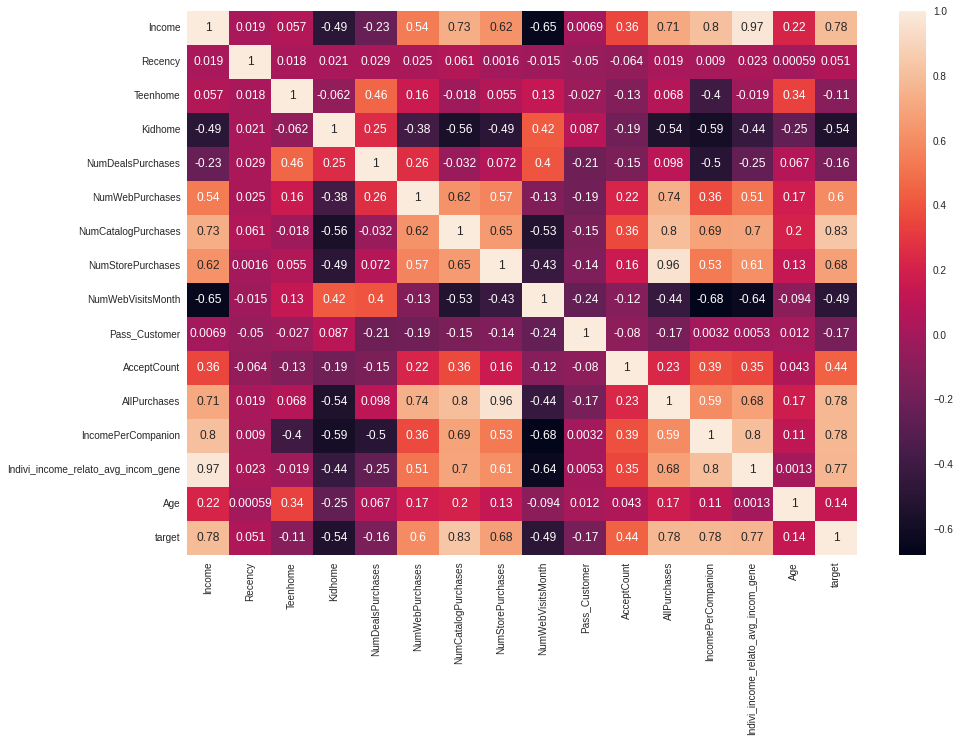

In [461]:
plt.figure(figsize = (15,10))
sns.heatmap(tmp_train[corr_fts4].corr(), annot = True)

## (7)[Purchasing_power_difference per_age]: (개인 구매이력 수) - (세대 당 평균 구매이력의 합산)

In [462]:
tmp_train = train.copy()
tmp_test = test.copy()

In [463]:
purchs_per_gene_train = [0]*7
cnt_person_per_gene_train = [0]*7

for age,purchs in  zip(tmp_train['Age'],tmp_train['AllPurchases']):
  if age<30:
    purchs_per_gene_train[0] += purchs
    cnt_person_per_gene_train[0] +=1
  elif age<40:
    purchs_per_gene_train[1] += purchs
    cnt_person_per_gene_train[1] +=1
  elif age<50:
    purchs_per_gene_train[2] += purchs
    cnt_person_per_gene_train[2] +=1
  elif age<60:
    purchs_per_gene_train[3] += purchs
    cnt_person_per_gene_train[3] +=1
  elif age<70:
    purchs_per_gene_train[4] += purchs
    cnt_person_per_gene_train[4] +=1
  elif age<80:
    purchs_per_gene_train[5] += purchs
    cnt_person_per_gene_train[5] +=1
  else:
    purchs_per_gene_train[6] += purchs
    cnt_person_per_gene_train[6] +=1


for i in range(7):
  print(i+2,"0  대 ",purchs_per_gene_train[i],cnt_person_per_gene_train[i])

avg_purchs_per_gene = [int(purchs_per_gene_train[i]/cnt_person_per_gene_train[i]) for i in range(7)]
print(avg_purchs_per_gene)

2 0  대  14.113482371333056 4
3 0  대  628.9874015963564 128
4 0  대  1411.7096890412888 277
5 0  대  1826.6528315669227 328
6 0  대  1637.2629610748027 231
7 0  대  958.4403511339053 131
8 0  대  65.83328321538673 9
[3, 4, 5, 5, 7, 7, 7]


In [464]:
Purchasing_power_difference_per_age = []
for gen,purchas in zip(tmp_train['Generation'],tmp_train['AllPurchases']):
  if gen == 20:
    Purchasing_power_difference_per_age.append(int(purchas-avg_purchs_per_gene[0]))
  elif gen == 30:
    Purchasing_power_difference_per_age.append(int(purchas-avg_purchs_per_gene[1]))
  elif gen == 40:
    Purchasing_power_difference_per_age.append(int(purchas-avg_purchs_per_gene[2]))
  elif gen == 50:
    Purchasing_power_difference_per_age.append(int(purchas-avg_purchs_per_gene[3]))
  elif gen == 60:
    Purchasing_power_difference_per_age.append(int(purchas-avg_purchs_per_gene[4]))
  elif gen == 70:
    Purchasing_power_difference_per_age.append(int(purchas-avg_purchs_per_gene[5]))
  elif gen == 80:
    Purchasing_power_difference_per_age.append(int(purchas-avg_purchs_per_gene[6]))

print(Purchasing_power_difference_per_age)

[3, 2, 3, -3, 0, 0, -5, -4, 2, 4, 7, -2, 3, 2, -3, 9, 8, 7, 6, -7, -2, -4, 0, -4, 4, -4, 7, -4, 7, -5, -3, -3, 0, -4, 0, 0, 0, 4, 1, -4, 3, 0, -4, -2, 0, 0, -3, -5, -3, 0, -1, 6, -2, 9, -2, -1, -1, 2, -4, 3, 4, 7, 3, 3, 5, -1, -4, 7, -3, -5, -3, 6, 7, -2, 0, 1, -4, -4, -1, 8, -4, -2, -3, -2, 3, 0, -4, 1, 2, 0, 0, -10, -1, -5, 0, -4, -2, -3, -4, 1, -3, -7, 3, 9, -6, 6, 0, -3, 0, 2, -4, -2, -5, -3, -4, 5, -2, 0, 6, 6, -2, -1, 1, 3, 4, 5, 0, -4, -4, -3, 0, 4, -4, 0, -2, 0, 2, 2, 4, -3, -5, -5, 7, 7, -4, 8, 0, 2, -1, 5, 6, -3, 1, 0, 5, 1, -6, 5, 9, 3, -3, 6, -3, -6, 7, 3, 5, -3, -5, -1, -6, -4, 4, -2, 5, -5, -2, 5, -3, 0, -5, 7, -8, -2, -1, 8, 5, -6, 8, -4, -3, -5, 0, 5, -7, 0, 11, -5, 6, -6, -4, 3, 3, -4, -5, 5, 0, -2, -6, 3, 1, 3, 4, 9, 10, -5, 0, 0, -7, -2, 8, 3, -3, 3, 4, 8, 3, -3, -5, 3, -5, -4, -1, 2, 6, -5, 2, 6, 1, -1, -3, 3, 6, 2, 0, -3, -7, -4, 4, -5, 6, 0, 1, -3, 0, 3, -2, 2, -2, -4, -3, -1, -5, 9, -3, -3, 0, 2, 5, 2, -6, 1, -4, 0, 4, -7, -4, 3, 1, 1, 8, -3, 6, -3, 6, 7, 6, 0, -

In [519]:
tmp_train['Purchasing_power_difference_per_age'] = Purchasing_power_difference_per_age

0       3
1       2
2       3
3      -3
4       0
       ..
1103   -1
1104   -1
1105   -5
1106    2
1107   -1
Name: Purchasing_power_difference_per_age, Length: 1108, dtype: int64

In [466]:
purchs_per_gene_test = [0]*7
cnt_person_per_gene_test = [0]*7

for age,purchs in  zip(tmp_test['Age'],tmp_test['AllPurchases']):
  if age<30:
    purchs_per_gene_test[0] += purchs
    cnt_person_per_gene_test[0] +=1
  elif age<40:
    purchs_per_gene_test[1] += purchs
    cnt_person_per_gene_test[1] +=1
  elif age<50:
    purchs_per_gene_test[2] += purchs
    cnt_person_per_gene_test[2] +=1
  elif age<60:
    purchs_per_gene_test[3] += purchs
    cnt_person_per_gene_test[3] +=1
  elif age<70:
    purchs_per_gene_test[4] += purchs
    cnt_person_per_gene_test[4] +=1
  elif age<80:
    purchs_per_gene_test[5] += purchs
    cnt_person_per_gene_test[5] +=1
  else:
    purchs_per_gene_test[6] += purchs
    cnt_person_per_gene_test[6] +=1


for i in range(7):
  print(i+2,"0  대 ",purchs_per_gene_test[i],cnt_person_per_gene_test[i])

avg_purchs_per_gene_test = [int(purchs_per_gene_test[i]/cnt_person_per_gene_test[i]) for i in range(7)]
print(avg_purchs_per_gene_test)

2 0  대  55.06908560245805 6
3 0  대  546.8740684607154 119
4 0  대  1596.1156343603627 307
5 0  대  1758.8162513102393 313
6 0  대  1512.2210379750775 236
7 0  대  829.622932955778 125
8 0  대  13.28098933536824 2
[9, 4, 5, 5, 6, 6, 6]


In [467]:
Purchasing_power_difference_per_age = []
for gen,purchas in zip(tmp_test['Generation'],tmp_test['AllPurchases']):
  if gen == 20:
    Purchasing_power_difference_per_age.append(int(purchas-avg_purchs_per_gene_test[0]))
  elif gen == 30:
    Purchasing_power_difference_per_age.append(int(purchas-avg_purchs_per_gene_test[1]))
  elif gen == 40:
    Purchasing_power_difference_per_age.append(int(purchas-avg_purchs_per_gene_test[2]))
  elif gen == 50:
    Purchasing_power_difference_per_age.append(int(purchas-avg_purchs_per_gene_test[3]))
  elif gen == 60:
    Purchasing_power_difference_per_age.append(int(purchas-avg_purchs_per_gene_test[4]))
  elif gen == 70:
    Purchasing_power_difference_per_age.append(int(purchas-avg_purchs_per_gene_test[5]))
  elif gen == 80:
    Purchasing_power_difference_per_age.append(int(purchas-avg_purchs_per_gene_test[6]))

print(Purchasing_power_difference_per_age)

[3, 4, 10, 8, 6, 9, -4, 1, 6, -3, 5, -3, -2, -3, -4, -4, 2, 0, 0, -6, 0, 0, 4, -4, -4, 9, -3, 3, 3, 8, -2, -2, 2, 0, 2, -4, 3, -4, -3, -3, 6, 6, -4, 2, 6, 0, 4, 3, 0, 7, 8, 0, 0, -3, 1, 3, 5, 1, -2, 0, 0, -4, -4, 3, 0, -4, -4, 7, 7, 6, 1, -5, -4, 0, -4, -6, -5, 2, -3, 0, -3, 8, -3, -3, -4, -3, 1, -5, 3, 4, 2, -4, 3, 1, -1, 3, 4, -4, 5, 9, -5, 8, 0, 0, -4, -3, -3, 4, 0, -5, 0, -4, 3, 9, -3, -6, 0, 0, 1, 4, 0, -4, 0, -3, 2, -5, 5, 1, -5, 2, 5, 5, -4, 1, 1, 0, 3, 7, 2, 1, 5, 4, -4, 0, 10, -4, -6, -6, 2, -1, 2, 6, 0, 3, -5, 9, -4, 2, -9, 3, 7, 0, -5, -5, 3, -2, -3, 0, -4, 6, -1, -4, 2, -4, 0, -1, -4, 0, 10, 8, -5, 0, -3, -5, -4, 6, 11, 5, 0, -5, -4, -4, -2, 0, 6, 5, 7, -1, -3, -2, -6, -2, 3, 1, -4, -3, -6, 5, 6, -5, 6, -4, 8, 7, 4, 1, -3, -4, -2, 0, 2, 6, 0, -5, -5, 3, 7, 0, -2, 8, 1, 0, -2, 1, -5, 2, -6, 5, 3, 0, 2, 1, -3, -5, 0, -4, 8, 3, -3, -4, -3, -3, -3, 5, 1, -4, 2, 8, -2, 1, -5, 3, 3, -4, 4, -2, 0, 3, 5, -3, 8, 2, 4, -2, -5, -2, -1, 9, -4, 8, -1, 1, -3, 0, 0, 7, -2, -2, 2, 6, -4, 8

In [518]:
tmp_test['Purchasing_power_difference_per_age'] = Purchasing_power_difference_per_age

0        3
1        4
2       10
3        8
4        6
        ..
1103    -4
1104    -4
1105    -2
1106     0
1107    -3
Name: Purchasing_power_difference_per_age, Length: 1108, dtype: int64

In [469]:
train['Purchasing_power_difference_per_age'] = tmp_train['Purchasing_power_difference_per_age']
test['Purchasing_power_difference_per_age'] = tmp_test['Purchasing_power_difference_per_age']

# 불필한 column 제거

In [470]:
drop_col = ['id','Year_Birth','Dt_Customer']

In [471]:
train = train.drop(drop_col, axis = 1)
test = test.drop(drop_col, axis = 1)

In [472]:
print(train.columns, len(train.columns))
print(test.columns,len(test.columns))

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'target', 'AllPurchases',
       'IncomePerCompanion', 'Pass_Customer', 'Age', 'Generation',
       'Indivi_income_relato_avg_incom_gene', 'AcceptCount',
       'Purchasing_power_difference_per_age'],
      dtype='object') 27
Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'AllPurchases',
       'IncomePerCompanion', 'Pass_Customer', 'Age', 'Generation',
       'Indivi_income_relato_avg_incom_gene', 'Accept

# (!!사용 X) Categorical Data 정리

In [218]:
print(train['Education'].unique())
print(train['Marital_Status'].unique())
print(train['Generation'].unique())

['Master' 'Graduation' 'Basic' 'PhD' '2n Cycle']
['Together' 'Single' 'Married' 'Widow' 'Divorced' 'Alone' 'YOLO' 'Absurd']
[40 60 70 50 30 80 20]


## Marital_ Status 소수 카테고리 정리

In [219]:
tmp_train = train
tmp_test = test

In [220]:
print(tmp_train['Marital_Status'].unique())

['Together' 'Single' 'Married' 'Widow' 'Divorced' 'Alone' 'YOLO' 'Absurd']


In [221]:
tmp_train=tmp_train.replace({'Marital_Status':'Widow'},'Divorced') # Widow를 Divorced 로 병합 (결혼 경험 O, 현재 결혼 상태 X)
tmp_test=tmp_test.replace({'Marital_Status':'Widow'},'Divorced')

In [222]:
print(tmp_train['Marital_Status'].unique())

['Together' 'Single' 'Married' 'Divorced' 'Alone' 'YOLO' 'Absurd']


In [223]:
tmp_train['Marital_Status']=tmp_train['Marital_Status'].replace(['Alone','YOLO','Absurd'],'Single') # 'Alone','YOLO','Absurd'를 Single 로 병합 (결혼 경험 O, 현재 결혼 상태 X)
tmp_test['Marital_Status']=tmp_test['Marital_Status'].replace(['Alone','YOLO','Absurd'],'Single')

In [224]:
print(tmp_train['Marital_Status'].unique())

['Together' 'Single' 'Married' 'Divorced']


In [225]:
# 적용
train['Marital_Status'] = tmp_train['Marital_Status']
test['Marital_Status'] = tmp_test['Marital_Status']

## Education 소수 카테고리 정리

In [226]:
tmp_train = train
tmp_test = test

In [227]:
print(tmp_train['Education'].unique())

['Master' 'Graduation' 'Basic' 'PhD' '2n Cycle']


In [228]:
tmp_train=tmp_train.replace({'Education':'2n Cycle'},'Basic') # 2년제 고졸 병합
tmp_test=tmp_test.replace({'Education':'2n Cycle'},'Basic')

In [229]:
print(tmp_train['Education'].unique())

['Master' 'Graduation' 'Basic' 'PhD']


In [230]:
# 적용
train['Education'] = tmp_train['Education']
test['Education'] = tmp_test['Education']

In [231]:
print(train['Education'].unique())
print(train['Marital_Status'].unique())

['Master' 'Graduation' 'Basic' 'PhD']
['Together' 'Single' 'Married' 'Divorced']


#One-Hot Encoding

In [473]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

print(train.columns, len(train.columns))
print(test.columns,len(test.columns))

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'target',
       'AllPurchases', 'IncomePerCompanion', 'Pass_Customer', 'Age',
       'Generation', 'Indivi_income_relato_avg_incom_gene', 'AcceptCount',
       'Purchasing_power_difference_per_age', 'Education_2n Cycle',
       'Education_Basic', 'Education_Graduation', 'Education_Master',
       'Education_PhD', 'Marital_Status_Absurd', 'Marital_Status_Alone',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'Marital_Status_YOLO'],
      dtype='object') 38
Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWe

In [474]:
train

,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,46014.0,1,1,21,2.258975,1.050430,-0.406135,8,7,0,...,1,0,0,0,0,0,0,1,0,0
1,76624.0,0,1,68,-0.801066,0.482071,1.740256,7,1,1,...,0,0,0,0,0,0,1,0,0,0
2,75903.0,0,1,50,0.146388,0.782006,1.195863,9,3,0,...,0,0,0,0,0,1,0,0,0,0
3,18393.0,1,0,2,0.146388,-0.258585,-1.354700,3,8,0,...,0,0,0,0,0,1,0,0,0,0
4,64014.0,2,1,56,1.846930,1.294037,0.127798,5,7,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,46097.0,0,1,11,1.421688,-0.258585,-0.406135,6,4,0,...,0,0,0,0,0,0,0,1,0,0
1104,23477.0,1,0,39,0.723198,-0.258585,-1.354700,4,8,0,...,0,0,0,0,0,1,0,0,0,0
1105,37368.0,1,0,4,-0.801066,-1.377247,-1.354700,2,6,1,...,1,0,0,0,0,1,0,0,0,0
1106,53034.0,1,1,30,2.006092,0.782006,-0.406135,7,8,0,...,0,0,0,0,1,0,0,0,0,0


# 모델링

## Case 1. Pycaret Best1

In [475]:
from pycaret.regression import *

In [476]:
exp_clf = setup(data = train, target = 'target', train_size = 0.9, use_gpu = True, data_split_shuffle=False, normalize = True, session_id=42)
# data - train set

# target - 종속변수(예측값)

# train_size - train과 validation 비율

# use_gpu - GPU 사용가능한 머신러닝 알고리즘에 적용할것인지(GPU가 있어야함)

# data_split_shuffle - dataset을 무작위로 섞을것인지

# normalize - 정규화를 진행할것인지

# session_id - seed값


,Description,Value
0,session_id,42
1,Target,target
2,Original Data,"(1108, 38)"
3,Missing Values,False
4,Numeric Features,24
5,Categorical Features,13
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(997, 78)"


In [477]:
best_5 = compare_models(sort = 'MAE', n_select = 5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.123308e+02,4.388091e+04,2.069839e+02,8.763000e-01,0.2715,2.239000e-01,1.188
rf,Random Forest Regressor,1.132219e+02,4.282359e+04,2.042730e+02,8.802000e-01,0.2798,2.517000e-01,1.236
lightgbm,Light Gradient Boosting Machine,1.156654e+02,4.506101e+04,2.087444e+02,8.729000e-01,0.3307,2.998000e-01,0.112
catboost,CatBoost Regressor,1.158126e+02,4.386167e+04,2.058784e+02,8.768000e-01,0.3398,3.195000e-01,2.580
xgboost,Extreme Gradient Boosting,1.166553e+02,4.755017e+04,2.145108e+02,8.667000e-01,0.3109,2.439000e-01,0.484
gbr,Gradient Boosting Regressor,1.209725e+02,4.351886e+04,2.062815e+02,8.777000e-01,0.3866,3.389000e-01,0.305
knn,K Neighbors Regressor,1.454645e+02,6.217818e+04,2.464951e+02,8.252000e-01,0.4154,4.913000e-01,0.144
dt,Decision Tree Regressor,1.598198e+02,8.967777e+04,2.964223e+02,7.465000e-01,0.3483,2.558000e-01,0.020
par,Passive Aggressive Regressor,1.776434e+02,7.357418e+04,2.694729e+02,7.934000e-01,0.7288,1.159900e+00,0.016
huber,Huber Regressor,1.787709e+02,7.644440e+04,2.741369e+02,7.851000e-01,0.7281,1.285200e+00,0.133


In [478]:
top1 = [rank for rank,i in zip(best_5,range(len(best_5))) if i<1]

In [479]:
tuned_top1 = [tune_model(i,optimize = 'RMSE', n_iter = 10) for i in top1]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,119.3080,42224.8423,205.4868,0.8644,0.3851,0.3804
1,154.9558,60566.5005,246.1026,0.8578,0.3977,0.4002
2,117.4955,38060.7564,195.0917,0.8771,0.3480,0.3053
3,121.1184,45106.2257,212.3823,0.8507,0.3629,0.3354
4,156.3755,67869.7778,260.5183,0.8111,0.3216,0.2873
5,131.1372,43466.2250,208.4856,0.8829,0.3270,0.3093
6,141.4467,47736.0411,218.4858,0.8716,0.5761,0.9295
7,159.8999,73403.5787,270.9309,0.8236,0.3938,0.3560
8,145.2379,60096.7247,245.1463,0.8229,0.3611,0.3357


In [480]:
stack_tuned_top1= stack_models(estimator_list = tuned_top1, fold = 10, optimize='MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,132.5563,51950.7999,227.9272,0.8332,0.7387,1.0965
1,154.2896,51921.2773,227.8624,0.8781,0.7650,1.1538
2,132.4695,38516.4180,196.2560,0.8757,0.7371,0.6447
3,123.1642,37717.9491,194.2111,0.8752,0.4648,0.5043
4,169.1153,75608.4107,274.9698,0.7895,0.6612,0.4886
5,129.2929,37458.5820,193.5422,0.8991,0.6126,0.4537
6,160.4393,67074.6458,258.9877,0.8195,0.8066,1.2440
7,157.1997,62300.4925,249.6007,0.8503,0.5971,0.5945
8,177.1886,83728.9620,289.3596,0.7532,0.7572,0.6789


In [481]:
final_model1 = finalize_model(stack_tuned_top1)

In [482]:
predictions1 = predict_model(final_model1, data = train)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,118.5618,32669.0302,180.7458,0.9102,0.6054,0.5353


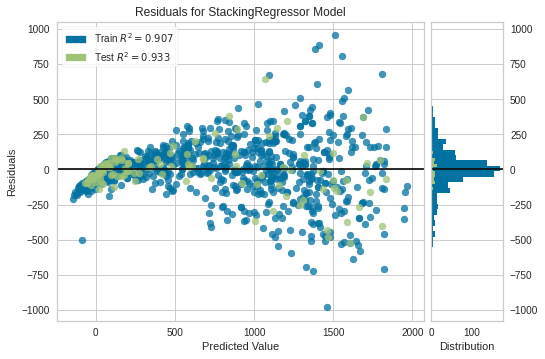

In [483]:
plot_model(final_model1)

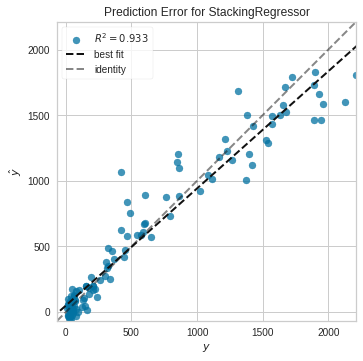

In [484]:
plot_model(final_model1, plot = 'error')

## Case 2. Pycaret Best3 Blend

In [485]:
best_5

[ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0,
                     min_impurity_split=None, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=42, verbose=0, warm_start=False),
 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False),
 LGBMRegres

In [486]:
top3 = [rank for rank,i in zip(best_5,range(len(best_5))) if i<3]

In [487]:
tuned_top3 = [tune_model(i,optimize = 'RMSE', n_iter = 10) for i in top3]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,102.7908,38166.5330,195.3626,0.8775,0.3678,0.2420
1,115.0740,43357.5564,208.2248,0.8982,0.3397,0.2594
2,102.5227,34437.9777,185.5747,0.8888,0.4079,0.2239
3,104.1893,38678.1813,196.6677,0.8720,0.2638,0.2108
4,139.2866,62588.0911,250.1761,0.8258,0.3310,0.2621
5,95.4490,28217.6293,167.9810,0.9240,0.2954,0.2264
6,125.6165,54385.7043,233.2074,0.8537,0.4759,0.6311
7,158.1366,72589.9339,269.4252,0.8256,0.2971,0.2475
8,137.3694,75312.7290,274.4316,0.7780,0.3325,0.2730


In [488]:
stack_tuned_top3 = stack_models(estimator_list = tuned_top3, fold = 10, optimize='MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,122.0314,42319.1053,205.7161,0.8641,0.7505,0.9571
1,139.1511,51335.1359,226.5726,0.8795,0.6747,0.9880
2,118.8927,34646.0757,186.1346,0.8882,0.7332,0.5175
3,110.1385,31117.0740,176.4003,0.8970,0.4752,0.4442
4,152.9675,68516.0223,261.7557,0.8093,0.5847,0.3574
5,109.7654,28757.2723,169.5797,0.9225,0.3554,0.3715
6,144.9317,62421.8991,249.8437,0.8320,0.7264,0.9779
7,150.2765,60396.8984,245.7578,0.8549,0.4806,0.4629
8,156.6356,78398.8208,279.9979,0.7689,0.7522,0.5500


In [489]:
final_model2 = finalize_model(stack_tuned_top3)

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 

In [490]:
predictions2 = predict_model(final_model2, data = train)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,72.0883,11356.7197,106.5679,0.9688,0.5549,0.4137


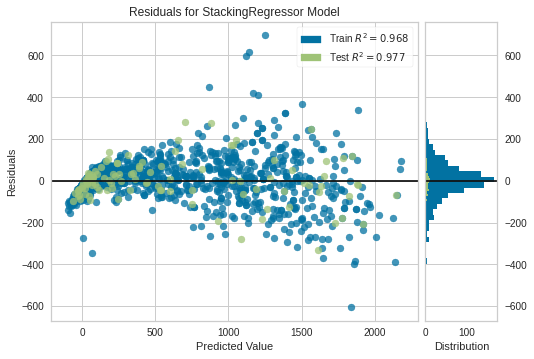

In [491]:
plot_model(final_model2)

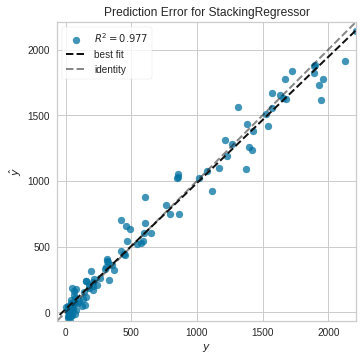

In [492]:
plot_model(final_model2, plot = 'error')

## Case 3. Pycaret Best5 Blend

In [493]:
top5 = [rank for rank in best_5]

In [494]:
tuned_top5 = [tune_model(i,optimize = 'RMSE', n_iter = 10) for i in top5]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,110.1000,38883.4900,197.1890,0.8752,0.3050,0.2763
1,115.6185,41452.7597,203.5995,0.9027,0.3578,0.2940
2,101.3919,32489.4367,180.2483,0.8951,0.3296,0.2421
3,104.5366,35605.1436,188.6933,0.8822,0.3689,0.2652
4,149.0747,62291.6164,249.5829,0.8266,0.3121,0.2532
5,98.5871,31601.8763,177.7692,0.9149,0.3388,0.2274
6,131.9092,46880.0771,216.5181,0.8739,0.5810,1.1623
7,150.6542,69215.4591,263.0883,0.8337,0.3566,0.3020
8,135.1243,67538.9751,259.8826,0.8009,0.3549,0.3134


In [495]:
stack_tuned_top5 = stack_models(estimator_list = tuned_top5, fold = 10, optimize='MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,120.1672,41385.3706,203.4339,0.8671,0.7395,0.9639
1,136.9931,49889.7302,223.3601,0.8829,0.6828,0.9783
2,113.4861,35011.2810,187.1130,0.8870,0.7368,0.4535
3,109.6660,30558.5905,174.8102,0.8989,0.6042,0.4433
4,154.6389,69594.8515,263.8084,0.8063,0.5309,0.3454
5,106.7499,27767.8205,166.6368,0.9252,0.3566,0.3645
6,145.0915,62328.3053,249.6564,0.8323,0.6306,0.9219
7,149.0977,63430.2599,251.8536,0.8476,0.4174,0.4205
8,153.5394,77895.5318,279.0977,0.7704,0.6602,0.5152


In [496]:
final_model3 = finalize_model(stack_tuned_top5)

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 

In [497]:
predictions3 = predict_model(final_model3, data = train)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,67.7836,10441.8633,102.1854,0.9713,0.5126,0.3697


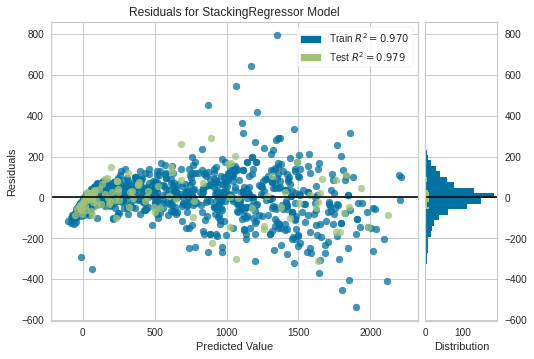

In [498]:
plot_model(final_model3)

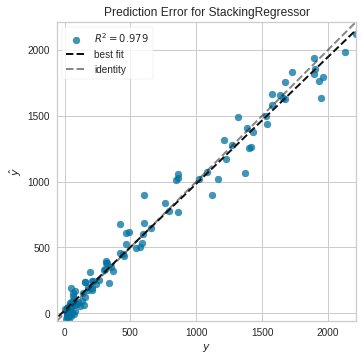

In [499]:
plot_model(final_model3, plot = 'error')

## 하나만 더 추가!!

In [500]:
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,112.4602,43053.0259,207.4922,0.8618,0.4390,0.4111
1,127.9322,49450.4255,222.3745,0.8839,0.3416,0.2973
2,98.4689,27889.7157,167.0021,0.9100,0.3348,0.2752
3,106.9695,31797.3838,178.3182,0.8948,0.3534,0.2929
4,147.1693,64856.8838,254.6701,0.8195,0.3259,0.2776
5,96.7617,24886.8995,157.7558,0.9330,0.3061,0.2491
6,125.8812,46331.0618,215.2465,0.8753,0.5143,0.6311
7,146.1960,60150.8111,245.2566,0.8555,0.5314,0.3559
8,126.7983,51602.0952,227.1609,0.8479,0.4032,0.3302


In [501]:
tuned_gbr = tune_model(gbr,optimize = 'RMSE', n_iter = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,117.7564,42767.8331,206.8039,0.8627,0.3834,0.3393
1,113.7435,38759.0676,196.8732,0.9090,0.3996,0.3949
2,100.5013,29038.4681,170.4068,0.9063,0.3157,0.2562
3,106.9570,36400.0576,190.7880,0.8795,0.2941,0.2264
4,142.6579,61916.9949,248.8313,0.8276,0.3471,0.2552
5,99.4388,27337.8995,165.3418,0.9263,0.2821,0.2398
6,121.7320,43709.9427,209.0692,0.8824,0.5141,0.8997
7,153.1141,72280.7284,268.8508,0.8263,0.4268,0.2832
8,142.7914,71350.1727,267.1145,0.7897,0.3734,0.3429


In [502]:
tuned_gbr

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=6,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.3, min_impurity_split=None,
                          min_samples_leaf=4, min_samples_split=10,
                          min_weight_fraction_leaf=0.0, n_estimators=270,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=0.7, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [503]:
tuned_top5.append(tuned_gbr)

In [504]:
tuned_top6=tuned_top5

In [505]:
stack_tuned_top6 = stack_models(estimator_list = tuned_top6, fold = 10, optimize='MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,121.9904,43021.9281,207.4173,0.8619,0.6854,0.9202
1,133.2358,48641.0355,220.5471,0.8858,0.6743,0.9200
2,113.1176,34662.7997,186.1795,0.8881,0.7714,0.4525
3,109.4279,30533.2995,174.7378,0.8990,0.6285,0.4240
4,150.4948,68547.4853,261.8157,0.8092,0.5919,0.3322
5,105.6510,27206.2312,164.9431,0.9267,0.3615,0.3660
6,141.8921,60319.6249,245.6005,0.8377,0.6552,0.8738
7,149.2231,64165.7190,253.3095,0.8458,0.4313,0.4212
8,153.5950,78167.1201,279.5838,0.7696,0.6351,0.5124


In [506]:
final_model4 = finalize_model(stack_tuned_top6)

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 

In [507]:
predictions4 = predict_model(final_model4, data = train)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,65.1706,9431.0678,97.1137,0.9741,0.4975,0.3671


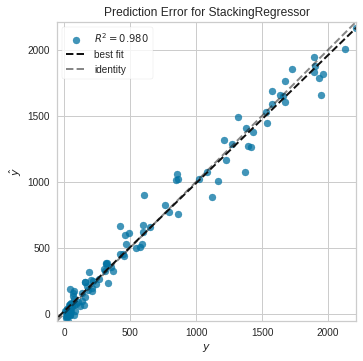

In [508]:
plot_model(final_model4, plot = 'error')

#성능비교 (Top1 vs Top3 vs Top5 vs Top6)

In [509]:
def NMAE(true, pred):
    mae = np.mean(np.abs(true-pred))
    score = mae / np.mean(np.abs(true))
    return score

In [510]:
print(predictions1['Label'])
print("============================================================================================")
print(predictions2['Label'])
print("============================================================================================")
print(predictions3['Label'])

0        543.915544
1        984.696190
2       1109.072663
3         18.696263
4        550.748760
           ...     
1103     113.419812
1104      45.817991
1105      -8.920445
1106     417.882437
1107     273.591193
Name: Label, Length: 1108, dtype: float64
0       585.367714
1       887.144428
2       999.986221
3        72.988902
4       449.965793
           ...    
1103    208.108278
1104     56.256189
1105     -2.541479
1106    442.741240
1107    332.057113
Name: Label, Length: 1108, dtype: float64
0        580.159590
1        882.039652
2       1020.162907
3         67.934089
4        454.183948
           ...     
1103     226.011101
1104      60.867633
1105      -6.774422
1106     446.891368
1107     329.628507
Name: Label, Length: 1108, dtype: float64


In [511]:
y_train = train['target']

In [512]:
score1 = NMAE(y_train,predictions1['Label'])
score2 = NMAE(y_train,predictions2['Label'])
score3 = NMAE(y_train,predictions3['Label'])
score4 = NMAE(y_train,predictions4['Label'])

In [513]:
print(
    f"[Top1 Model]\t\tsocore1 : {score1}\n[Top3 Blend Model]\tsocore2 : {score2}\n[Top5 Blend Model]\tsocore3 : {score3}\n[Top6 Blend Model]\tsocore4 : {score4}"
)

[Top1 Model]		socore1 : 0.19212050673669342
[Top3 Blend Model]	socore2 : 0.1168136817080761
[Top5 Blend Model]	socore3 : 0.10983821010499523
[Top6 Blend Model]	socore4 : 0.10560418198766998


# Test 예측

In [514]:
submission = pd.read_csv('sample_submission.csv')

In [515]:
predictions4 = predict_model(final_model4, data = test)

In [516]:
submission['target'] = predictions3['Label']

In [517]:
submission.to_csv("submission3.csv", index=False)